In [3]:

import pandas as pd
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [2]:
pip install minisom


  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.2-py3-none-any.whl size=10650 sha256=7cd3978f5f78962089290f76127a40efb05ca4f4a54e2179327af935581ea1e7
  Stored in directory: /root/.cache/pip/wheels/b4/f6/8a/9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
Successfully built minisom


In [ ]:
#1 Load the dataset

In [7]:
data = pd.read_csv("Heart-Copy1.csv")

In [ ]:
#2 Pre-processing steps (if required)

In [8]:
data.dropna(inplace=True)
data['ChestPain'] = data['ChestPain'].astype('category')
mapping = {
    'typical': 1,
    'asymptomatic': 2,
    'nonanginal': 3,
    'nontypical': 4
}
# Perform mapping
data['ChestPain_Mapped'] = data['ChestPain'].map(mapping)
data.drop('ChestPain', axis=1, inplace=True)
# Print the modified DataFrame
print(data)


     Unnamed: 0  Age  Sex  RestBP   Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
0             1   63    1     145  233.0    1        2  150.0      0      2.3   
1             2   67    1     160  286.0    0        2  108.0      1      1.5   
2             3   67    1     120  229.0    0        2  129.0      1      2.6   
3             4   37    1     130  250.0    0        0  187.0      0      3.5   
4             5   41    0     130  204.0    0        2  172.0      0      1.4   
..          ...  ...  ...     ...    ...  ...      ...    ...    ...      ...   
301         302   57    0     130  236.0    0        2  174.0      0      0.0   
302         303   38    1     138  175.0    0        0  173.0      0      0.0   
303         304   45    1     110  264.0    0        0  132.0      0      1.2   
304         305   30    1     120  200.0    0        2  140.0      0      1.0   
305         306   68    1     124  197.0    0        0  136.0      1      0.0   

     Slope  Ca        Thal 

In [ ]:
#3 Remove the target variable (if available)

In [9]:
target_variable = "AHD"
if target_variable in data.columns:
    data.drop(target_variable, axis=1, inplace=True)

In [ ]:
#4 Plot the datapoints using scatter plots

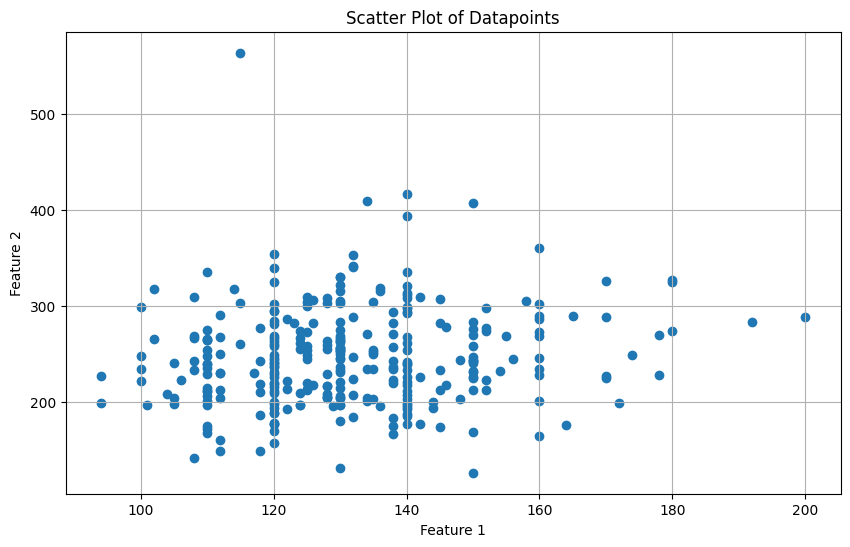

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(data["RestBP"], data["Chol"])  # Replace "feature1" and "feature2" with your feature names
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot of Datapoints")
plt.grid(True)
plt.show()

In [ ]:
# 5 Apply SOM clustering approach
# Determine the optimal SOM grid size (e.g., using Kohonen's rule)

In [11]:
grid_size = som_dim = int(5 * (data.shape[0]) ** 0.543)
data.drop('Thal', axis=1, inplace=True)
# Train SOM
som = MiniSom(grid_size, grid_size, data.shape[1], sigma=0.5, learning_rate=0.5)
data_scaled = MinMaxScaler().fit_transform(data.values)
som.train(data_scaled, 100)

In [ ]:
#6 Print and plot the cluster centroids and cluster labels

<ipython-input-12-b2d2f9c3ee00>:6: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ro" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(winner[0] + 0.5, winner[1] + 0.5, 'ro', marker='x', markersize=10)


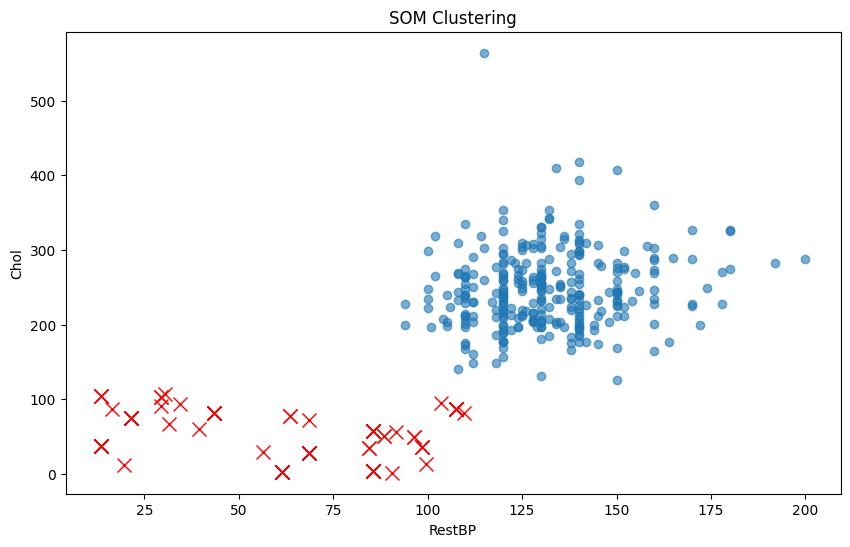

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(data["RestBP"], data["Chol"], alpha=0.6)
for i in range(len(data)):
    winner = som.winner(data_scaled[i])
    plt.plot(winner[0] + 0.5, winner[1] + 0.5, 'ro', marker='x', markersize=10)
plt.title('SOM Clustering')
plt.xlabel('RestBP')
plt.ylabel('Chol')
plt.show()

For 3 clusters - Silhouette Score: 0.12186404895296186, Davies Bouldin Score: 1.2501076141258776


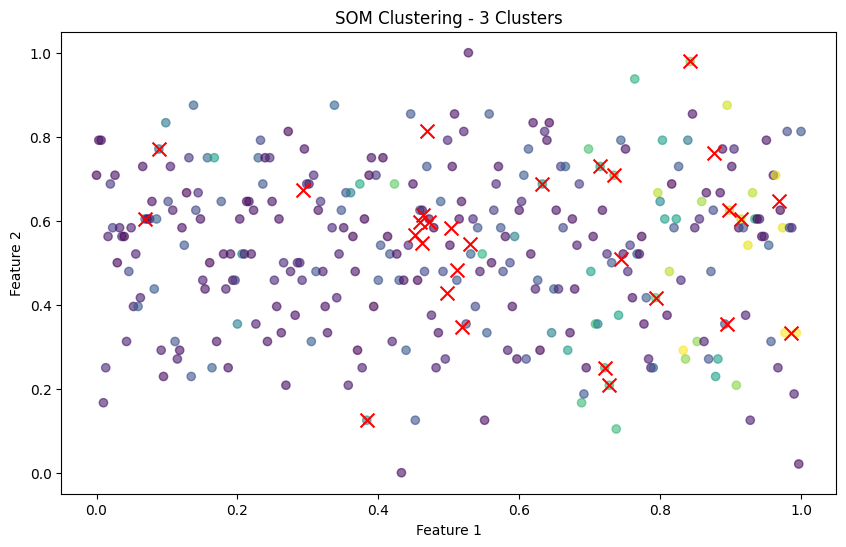

For 5 clusters - Silhouette Score: 0.10993477421786055, Davies Bouldin Score: 1.133997440494638


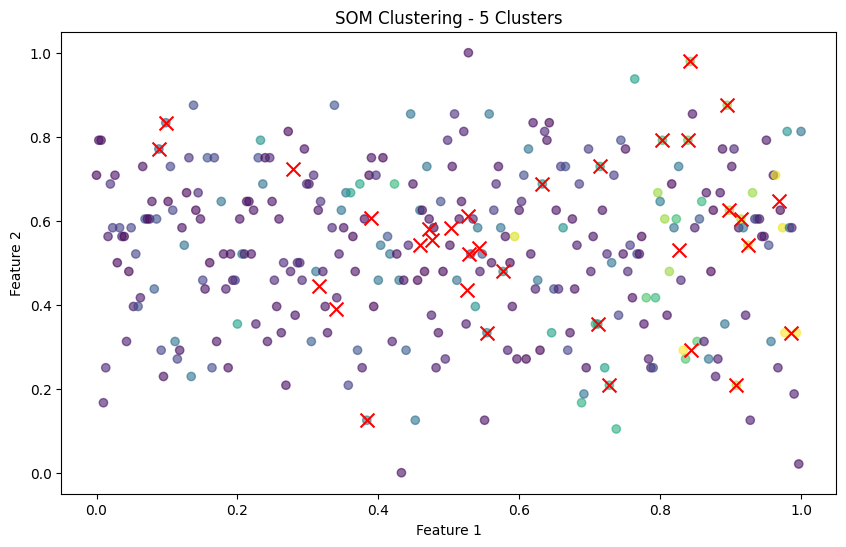

For 7 clusters - Silhouette Score: 0.14363580677125015, Davies Bouldin Score: 1.2511668511271448


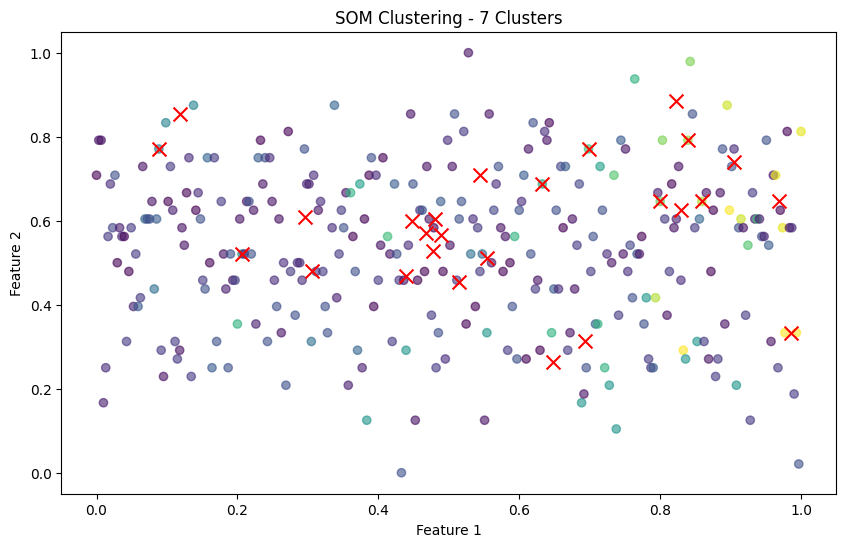

In [14]:
#7 Repeat the algorithm for 'n' number of clusters
import numpy as np

# Assuming you have 'data_scaled' and 'grid_size' defined somewhere before

n_clusters = [3, 5, 7]  # Example number of clusters

for n in n_clusters:
    som = MiniSom(grid_size, grid_size, data_scaled.shape[1], sigma=0.5, learning_rate=0.5)
    som.train(data_scaled, 100)
    clusters = {}

    for i, vector in enumerate(data_scaled):
        win = som.winner(vector)
        if win in clusters:
            clusters[win].append(i)
        else:
            clusters[win] = [i]

    # Calculate the cluster centroids
    cluster_centroids = [np.mean([data_scaled[j] for j in clusters[k]], axis=0) for k in clusters]

    # Obtain the cluster labels using the nearest centroid for each data point
    labels = [min(range(len(clusters)), key=lambda x: np.linalg.norm(cluster_centroids[x] - data_scaled[i])) for i in range(len(data_scaled))]

    #  8: Measure the performance using silhouette score and db score
    silhouette = silhouette_score(data_scaled, labels)
    db_score = davies_bouldin_score(data_scaled, labels)
    print(f"For {n} clusters - Silhouette Score: {silhouette}, Davies Bouldin Score: {db_score}")

    # 9: Print and plot the cluster centroids and cluster labels for 'n' number of clusters
    plt.figure(figsize=(10, 6))
    plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels, cmap='viridis', alpha=0.6)
    plt.scatter(np.array(cluster_centroids)[:, 0], np.array(cluster_centroids)[:, 1], marker='x', color='red', s=100)
    plt.title(f'SOM Clustering - {n} Clusters')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
